## [[데이콘] 전복 나이 예측 경진대회](https://dacon.io/competitions/official/235877/overview/description)
[참고 자료](https://dacon.io/competitions/official/235877/codeshare/4717?page=1&dtype=recent)

- id : 샘플 아이디
- Gender : 전복 성별(I: Infant(유충))
- Lenght : 전복 길이
- Diameter : 전복 둘레
- Height : 전복 키 
- Whole : Weight : 전복 전체 무게
- Shucked Weight : 껍질을 제외한 무게
- Viscra Weight : 내장 무게
- Shell Weight : 껍질 무게
- Target : 전복 나이

## 1. 데이터 로드

In [1]:
# 모듈 불러오기
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('data/전복 나이 예측 경진대회/train.csv')
train.drop('id', inplace = True, axis=1)

test = pd.read_csv('data/전복 나이 예측 경진대회/test.csv')
test.drop('id', inplace = True, axis=1)

sample_submission = pd.read_csv('data/전복 나이 예측 경진대회//sample_submission.csv')

In [4]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [5]:
test.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


### 1) 데이터 셋 split(train, test)

In [6]:
print(train.shape)
print(test.shape)

(1253, 9)
(2924, 8)


In [7]:
# 학습 데이터에 대한 전반적인 데이터 정보를 살펴봅니다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          1253 non-null   object 
 1   Lenght          1253 non-null   float64
 2   Diameter        1253 non-null   float64
 3   Height          1253 non-null   float64
 4   Whole Weight    1253 non-null   float64
 5   Shucked Weight  1253 non-null   float64
 6   Viscra Weight   1253 non-null   float64
 7   Shell Weight    1253 non-null   float64
 8   Target          1253 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 88.2+ KB


## 2. 결측치 및 이상치 확인, 제거

In [8]:
train.isnull().sum()

Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Target            0
dtype: int64

In [10]:
# !pip install missingno

[missingno](https://hong-yp-ml-records.tistory.com/14): 결측데이터들을 파악하는데 직관적인 도움을 주는 패키지


In [16]:
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

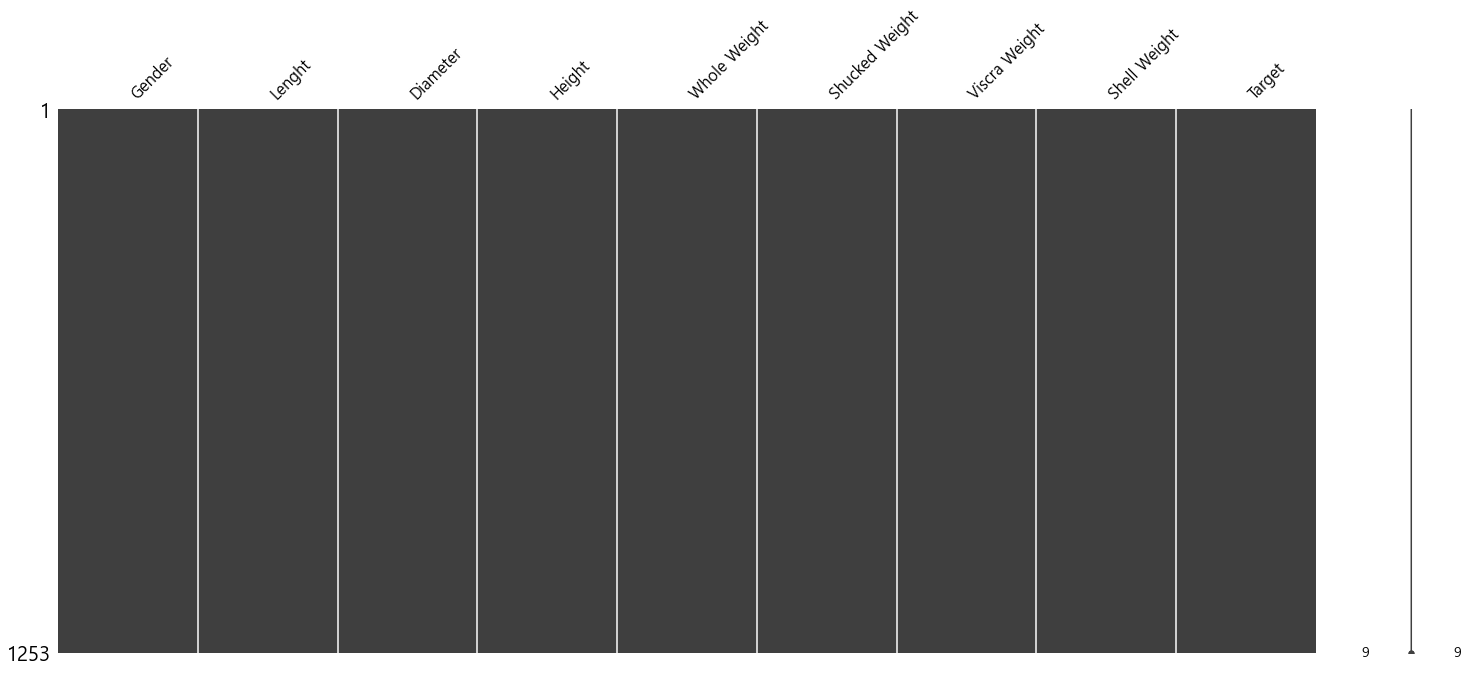

In [25]:
# matirx version
plt.rc('font', family = 'Malgun Gothic')
msno.matrix(train)
plt.show()

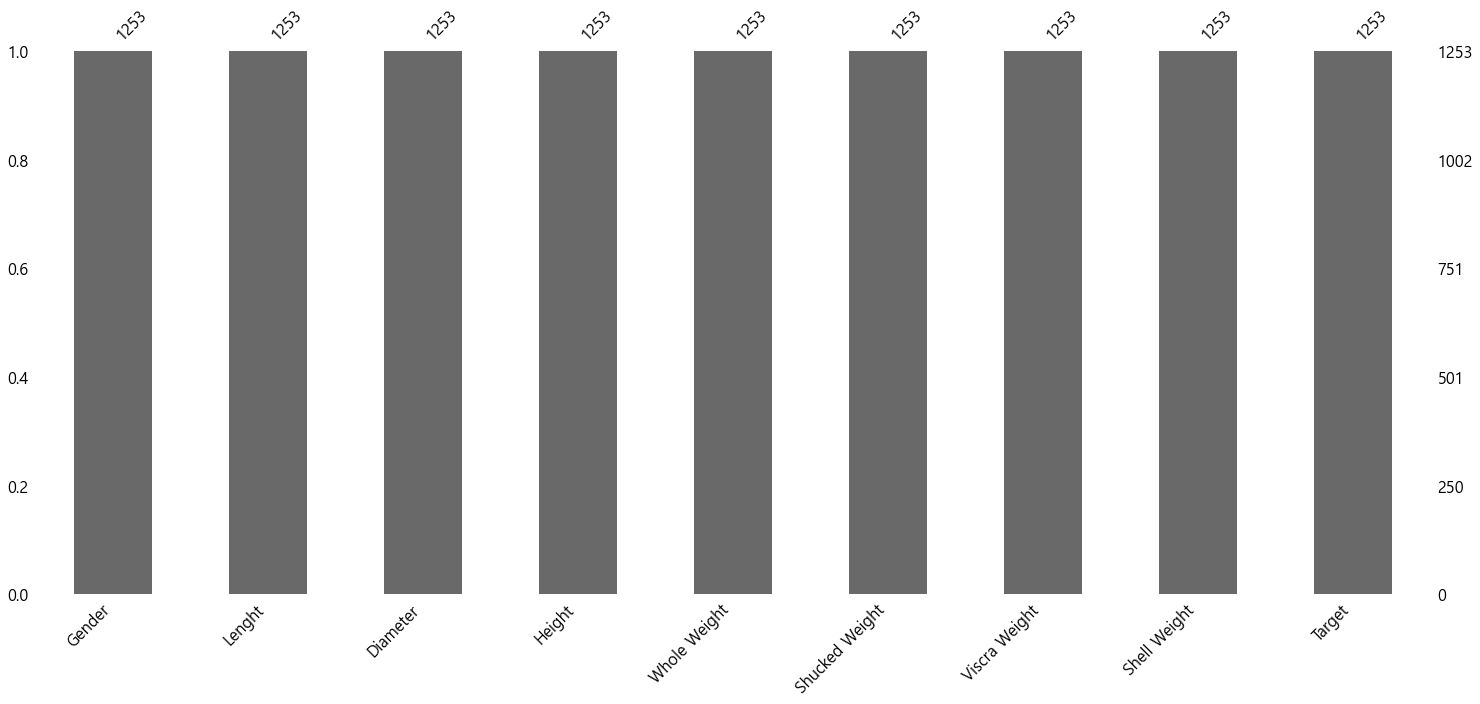

In [26]:
# barchart version
msno.bar(train)
plt.show()

### 2) 이상치를 확인하기 위해서는 변수별 EDA를 수행해야 한다.

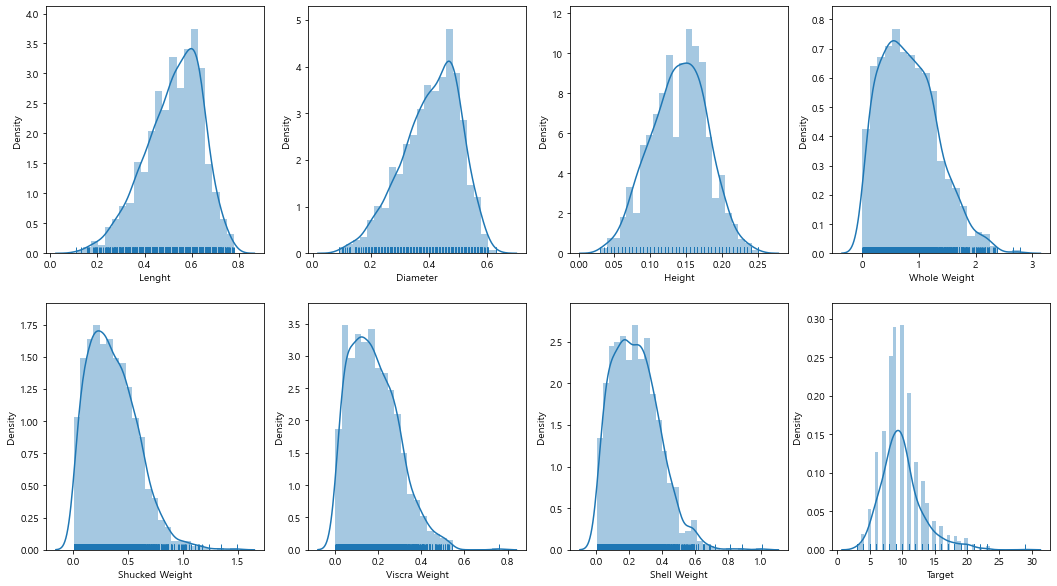

In [44]:
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') # 경고 메시지 무시, 다시 활성화하고 싶을 때 → warnings.filterwarnings(action='default')

# 컬럼별 Data 분포 히스토그램
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (18, 10))

num = 0
ax = ax.flatten() # 2*4행렬을 순차적으로 불러오기 위해 flatten 함수 사용

for col in list(train.columns[1:]):
    sns.distplot(train[col], ax = ax[num], kde = True, rug = True) # kde True는 확률 밀도 곡선이 나오고, rug는 하부에 밀도 분포표시
    num += 1    
    
plt.show()